In [ ]:
'''
ПРИКЛАД 1.2

https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy

Цей набір даних пропонує всебічний погляд на економію палива в автомобільному світі, 
досліджуючи деталі різних транспортних засобів, що охоплюють різні роки, марки та моделі. 
Він містить інформацію про технічні характеристики двигуна, типи палива, системи трансмісії 
та навіть такі фактори, як економія палива, викиди CO2 та технологічні особливості.
'''

In [16]:
import pandas as pd 
import numpy as np
taxi_mex = pd.read_csv('dataset/fuel.csv', low_memory=False)
print(taxi_mex)

def generate_distribution_sample(data, sample_size, dist_size): 
    sample_means = []
    for i in range(dist_size):
        sample = np.random.choice(a = data, size = sample_size) 
        sample_means.append(np.mean(sample))
    return sample_means

sample_size = 10000
dist_size = 38000
sample_means = generate_distribution_sample(taxi_mex['city_range_ft1'], sample_size, dist_size)


       vehicle_id  year        make               model  \
0           26587  1984  Alfa Romeo           GT V6 2.5   
1           27705  1984  Alfa Romeo           GT V6 2.5   
2           26561  1984  Alfa Romeo  Spider Veloce 2000   
3           27681  1984  Alfa Romeo  Spider Veloce 2000   
4           27550  1984  AM General   DJ Po Vehicle 2WD   
...           ...   ...         ...                 ...   
38108       37564  2017       Volvo            XC60 FWD   
38109       37547  2017       Volvo            XC90 AWD   
38110       37548  2017       Volvo            XC90 AWD   
38111       37703  2017       Volvo       XC90 AWD PHEV   
38112       37687  2017       Volvo            XC90 FWD   

                                    class              drive  \
0                        Minicompact Cars                NaN   
1                        Minicompact Cars                NaN   
2                             Two Seaters                NaN   
3                             Two S

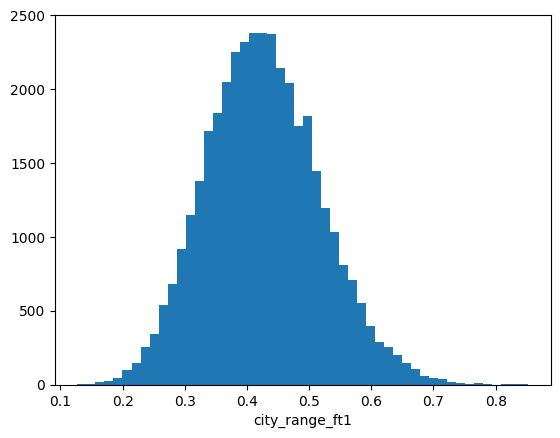

In [17]:
import matplotlib.pyplot as plt 
plt.hist(sample_means, bins=50) 
plt.xlabel('city_range_ft1') 
plt.show()

In [25]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval for bootstrap:", (lb, ub))

conf interval for bootstrap: (0.25818226474999995, 0.6170705455000001)


In [ ]:
'''
ПРИКЛАД 1.3

https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy

У статистиці t-критерій Стьюдента – це набір методів для перевірки гіпотез, 
які часто його використовують для перевірки рівності середніх значень вибірки. 
Для цього потрібно, щоб було обчислена спочатку t-статистика, після чого її 
потрібно порівняти з деяким граничним значенням, що дозволить прийняти рішення 
про прийняття або відхилення самої гіпотези.

T-статистика будується за таким принципом: 
у чисельнику вказується величина з нульовим математичним очікуванням, 
а в знаменнику – стандартне відхилення від цієї випадкової величини.

Алгоритм перевірки гіпотез побудований за таким принципом: 
для початку потрібно, щоб була визначена деяка нульова гіпотеза. 
У разі порівняння середніх потрібно прийняти припущення, 
що середні значення за двома вибірками рівні. 
Також визначається альтернативне їй припущення – нерівність середніх значень. 
Після цього обчислюється t-статистика і порівнюється з показником p-value 
(ймовірність прийняття нульової гіпотези).

P-value – це ймовірність прийняття нульової гіпотези за умови, 
що справедлива альтернативна гіпотеза. 
Тобто, якщо p-value дуже маленьке значення, 
то, швидше за все, не відбуваються взагалі якісь випадкові процеси. 
Але якщо ж p-value досить велике, то ймовірність того, що вибірки, 
отримані випадковим чином, не мають ніяких зв’язків, дуже значна.


'''

In [5]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
set_1 = pd.read_csv('dataset/fuel.csv', low_memory=False)


In [6]:
sample = set_1['city_range_ft1'].sample(n=3000) 
print(stats.ttest_1samp(sample, 0.05))

TtestResult(statistic=2.8692428169297033, pvalue=0.004143336589608901, df=2999)


In [7]:
set_1.shape

(38113, 81)

In [8]:
print(stats.ttest_ind(set_1['city_range_ft1'].sample(n=5000), 
                      set_1['highway_range_ft1'].sample(n=5000)))

TtestResult(statistic=0.023170554051331123, pvalue=0.9815146891586664, df=9998.0)


In [9]:
print(stats.ttest_ind(set_1['city_range_ft2'].sample(n=10000), 
                      set_1['highway_range_ft2'].sample(n=10000)))

TtestResult(statistic=2.139651660233698, pvalue=0.03239499588789927, df=19998.0)


In [10]:
control = set_1['composite_city_mpg'].sample(n=7000)
treatment = set_1['composite_highway_mpg'].sample(n=7000)
print(stats.ttest_rel(control, treatment))


TtestResult(statistic=-0.6505790999665874, pvalue=0.515339580821935, df=6999)
